In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
 df = pd.read_excel("Models\IWA.xlsx", sheet_name='Final Raw Sample(3%)')
 df.head()

,Year,Company Name,Country,GICS Sub-Industry,Industry (Exiobase),Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
0,2019,SAGA PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Multi-line Insurance,Activities auxiliary to financial intermediati...,-0.010415,-0.046989,-1.148703e+07,-1.123710e+07,-2602.469978,...,-61541.905533,-1059.042606,-4.601425,-0.370166,-1295.252263,-5.484575,71.252219,71.252219,-468.060022,0.006135
1,2019,BURSA MALAYSIA BHD,MALAYSIA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.006172,-0.012754,-7.244098e+05,-7.079386e+05,-165.923420,...,-4823.472569,-168.146428,-1.369721,-0.435001,-80.693593,-1.632612,16.655875,16.655875,-28.698267,0.043215
2,2019,INTERTEK GROUP PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.005523,-0.034259,-2.188151e+07,-2.140410e+07,-5012.270759,...,-117104.605466,-3804.051175,-16.528190,-1.329625,-2484.645598,-19.700439,255.935962,255.935962,-892.152710,0.011467
3,2019,JSE LIMITED,SOUTH AFRICA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.005327,NaN,-8.341370e+05,-8.153911e+05,-184.180256,...,-4396.445439,-901.413470,-0.184194,-0.363841,-91.327105,-0.219547,0.618135,0.618135,-33.382235,0.016390
4,2019,BUREAU VERITAS SA,FRANCE,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.002534,-0.018462,-1.448471e+07,-1.416778e+07,-3433.217789,...,-77276.296027,-4116.308632,-36.717300,-3.292484,-1668.361350,-43.764435,588.677794,588.677794,-591.706523,0.033005


In [3]:
airline_df = df[df['GICS Sub-Industry'] == 'Pharmaceuticals']
#airline_df.groupby("Company Name").describe
airline_df.shape

(328, 34)

In [9]:
# Group the data by "Company Name" and count unique years for each group
company_years_count = airline_df.groupby("Company Name")["Year"].nunique()

# Filter companies with at least 10 years of data
filtered_companies = company_years_count[company_years_count >= 10].index

# Create a new DataFrame with only the companies that meet the criteria
filtered_df = airline_df[airline_df["Company Name"].isin(filtered_companies)]
filtered_df.shape

(180, 34)

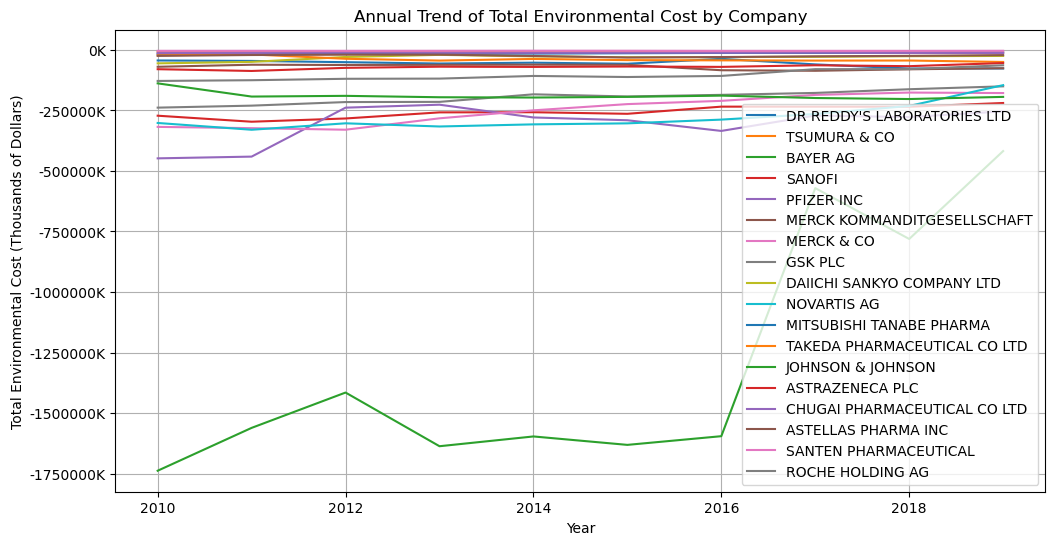

In [10]:
# Create a unique list of company names
company_names = filtered_df["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Function to format Y-axis labels in thousands
def thousands(x, pos):
    'The two args are the value and tick position'
    return f'{x / 1000:.0f}K'

# Create a FuncFormatter object using the thousands function
formatter = FuncFormatter(thousands)

# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = filtered_df[filtered_df["Company Name"] == company]
    plt.plot(company_data["Year"], company_data["Total Environmental Cost"], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Total Environmental Cost (Thousands of Dollars)")
plt.title("Annual Trend of Total Environmental Cost by Company")
plt.legend(loc="best")

# Apply the Y-axis label formatting
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.grid()
plt.show()

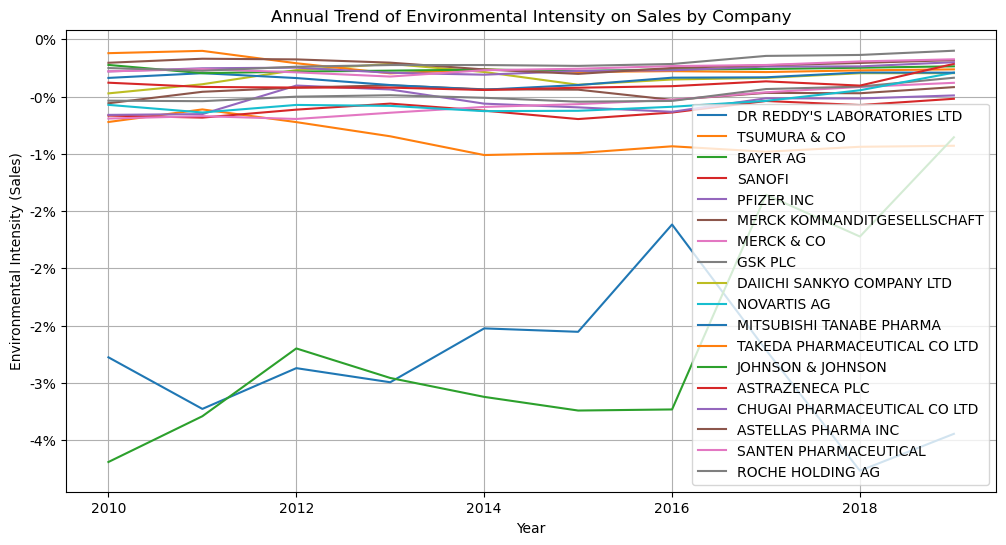

In [11]:
# Create a unique list of company names
company_names = filtered_df["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Function to format Y-axis labels as percentages
def percentage(x, pos):
    return f'{x:.0%}'

# Create a FuncFormatter object using the percentage function
formatter = FuncFormatter(percentage)

# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = filtered_df[filtered_df["Company Name"] == company]
    plt.plot(company_data["Year"], company_data["Environmental Intensity (Sales)"], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Environmental Intensity (Sales)")
plt.title("Annual Trend of Environmental Intensity on Sales by Company")
plt.legend(loc="best")

# Apply the Y-axis label formatting as percentages
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.grid()
plt.show()

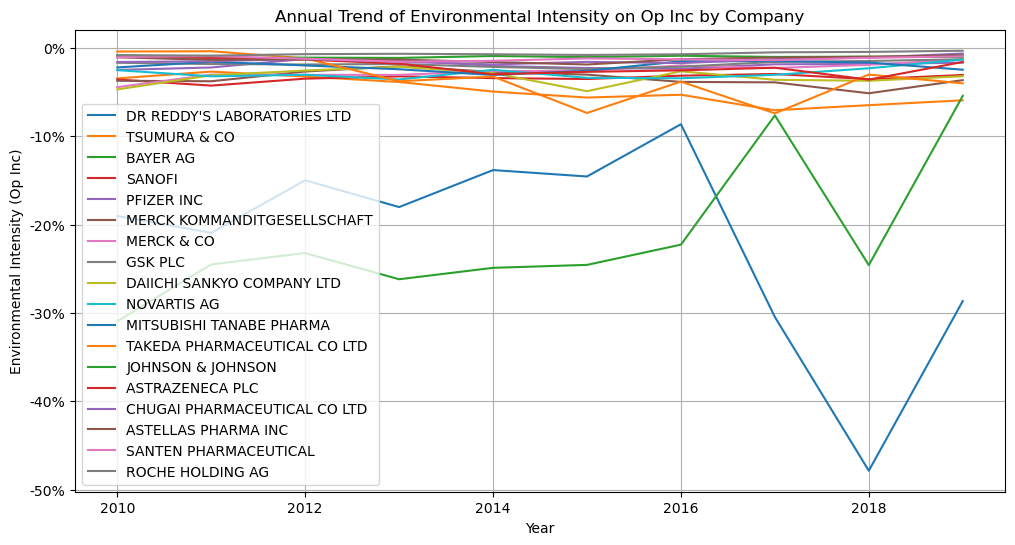

In [12]:
# Create a unique list of company names
company_names = filtered_df["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Function to format Y-axis labels as percentages
def percentage(x, pos):
    return f'{x:.0%}'

# Create a FuncFormatter object using the percentage function
formatter = FuncFormatter(percentage)

# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = filtered_df[filtered_df["Company Name"] == company]
    plt.plot(company_data["Year"], company_data["Environmental Intensity (Op Inc)"], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Environmental Intensity (Op Inc)")
plt.title("Annual Trend of Environmental Intensity on Op Inc by Company")
plt.legend(loc="best")

# Apply the Y-axis label formatting as percentages
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.grid()
plt.show()